In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

In [2]:
import pandas as pd
import numpy as np

| Problem                | Hypothesis                                     | Columns Needed                                          | Opportunity                   |
| ---------------------- | ---------------------------------------------- | ------------------------------------------------------- | ----------------------------- |
| High cancellation rate | **H1: Long lead time increases cancellations** | `lead_time`, `is_canceled`                              | Dynamic pricing, deposits     |
| High cancellation rate | **H2: OTA guests cancel more**                 | `market_segment`, `distribution_channel`, `is_canceled` | Channel-specific policies     |
| High cancellation rate | **H3: Deposits reduce cancellations**          | `deposit_type`, `is_canceled`                           | Risk-based deposit strategies |


# Exploration

## Read .csv-file

In [3]:
df = pd.read_csv("/Users/dv/Documents/myProjects/hotel-business-problems/data/raw/hotel_booking.csv")

## Copy Dataframe

In [4]:
original_df = df
df = original_df.copy(deep=True)

## Head

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Tail

In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


## Shape

In [7]:
df.shape


(119390, 36)

## Describe

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Duplicates


In [9]:
df.duplicated().sum()

np.int64(0)

## Info


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## DTypes

In [11]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Missing values

In [12]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [13]:
missing_ratio = df.isna().mean().sort_values(ascending=False)
missing_ratio

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
hotel                             0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
reserved_room_type                0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
reservation_status_date           0.000000
name                              0.000000
email                             0.000000
phone-number                      0.000000
assigned_room_type                0.000000
previous_bookings_not_canceled    0.000000
is_canceled                       0.000000
previous_cancellations            0.000000
is_repeated_guest                 0.000000
distributio

In [14]:
# Filter columns
# filter columns
threshold_nan = .9

cols_to_drop = missing_ratio[missing_ratio > threshold_nan].index
cols_to_drop

Index(['company'], dtype='object')

In [15]:
# drop cols from df
df_drop_cols = df.drop(columns=cols_to_drop)
df_drop_cols

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [16]:
print("Original Df: ", df.shape)
print("Drop Cols Df: ", df_drop_cols.shape)

Original Df:  (119390, 36)
Drop Cols Df:  (119390, 35)


## Distribution

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import save_current_fig

In [18]:
sns.set_style("whitegrid")

# globale rcParams für schwarze Kanten
plt.rcParams["patch.edgecolor"] = "black"   # Bars / Hist / Boxes
plt.rcParams["patch.force_edgecolor"] = True

### numerical distribution

In [19]:
# select all numerical cols
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

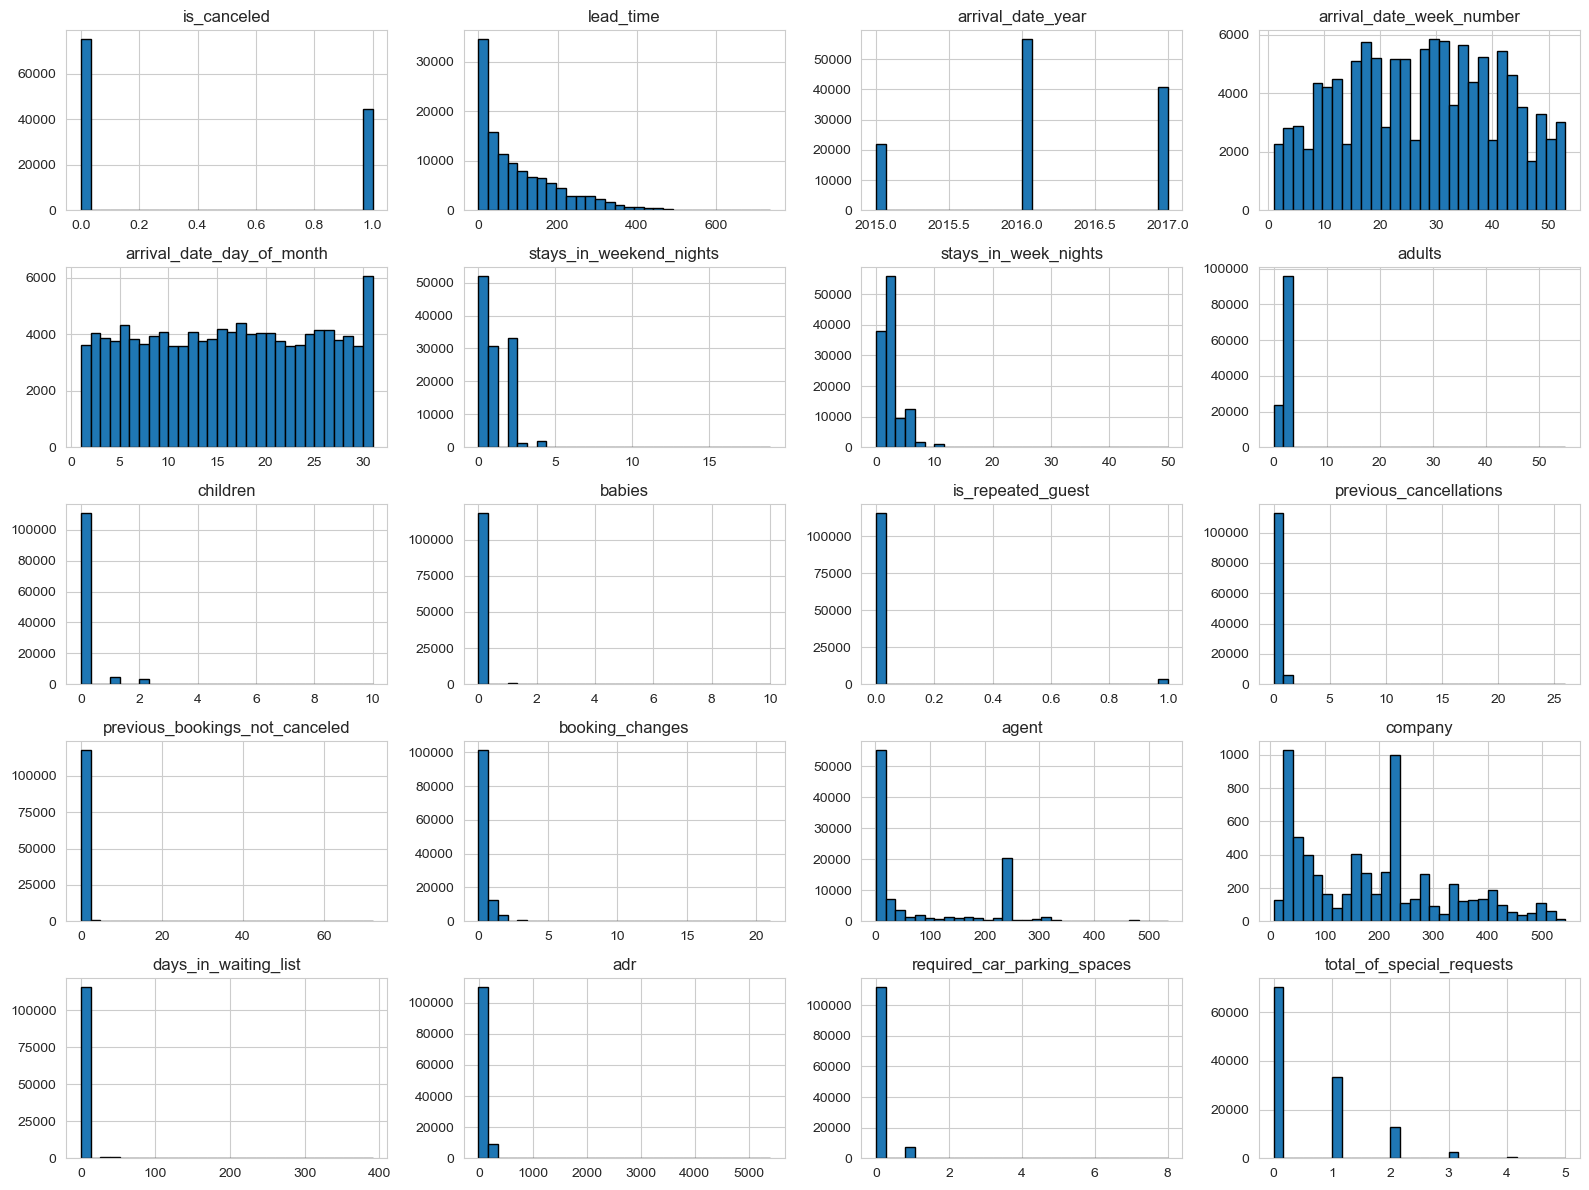

In [20]:
df[num_cols].hist(bins=30, figsize=(16, 12))
plt.tight_layout()
plt.show()


desc:
1. is_canceled => 67% not canceled, 37% canceled
2. lead_time => right skewed => last minute bookings
3. arrival_date_year => peak 2016
4. arrival_date_week_number => balanced, no seasonal peaks; correlation with is_canceled
5. stays_in_weekend_nights => most guests 0-2 nights; push package deals for longer stays
6. stays_in_week_nights => short termers 1-4 nights dominate
7. --
8. adults => 2 adults primarily
9. children => most bookings 0 kids, some 1
10. babies => rarely
11. is_repeated_guest => almost none; 95% never return; why?; check guest
12. previous_cancellations => almost 0; good variable for cancellations
13. --
14. booking_changes => most 0, outliers with 20
15. agent => lots of bookings through id 0-50; peaks 9 and 240; dominant agencies
16. company => lots of nan-values; peaks with company ids
17. days_in_waiting_list => most=0; outliers to 400; zoom on outliers
18. adr => extreme skew; most=50-200$; outliers to 5400 => outliers handling
19. required_car_parking_spaces => very low; indicates big city and city center
20. total_of_special_requests =>

Key Insights From Numerical Distributions

The cancellation target variable is highly imbalanced (≈63% not canceled vs. 37% canceled).

Most bookings are made with short lead times (<60 days), with a long right tail up to 700 days.

Stay durations are short: most guests stay 1–4 nights on weekdays and 0–2 nights on weekends.

Most bookings include 1–2 adults and no children or babies.

Very few guests are repeated customers (is_repeated_guest ≈ 3%).

Many numeric variables show extreme outliers (adr, days_in_waiting_list, stays_in_week_nights).

Variables like previous_cancellations and previous_bookings_not_canceled are heavily skewed but may still carry predictive signal.

The agent column shows strong clustering around specific agent IDs, supporting Hypothesis H3 (high cancellation in travel agencies).

## Cancellation Rate

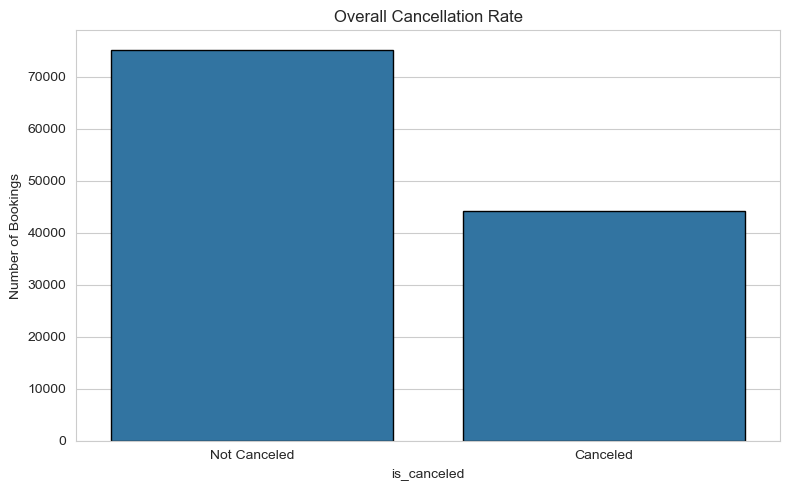

In [21]:
cancel_counts = df["is_canceled"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=cancel_counts.index, y=cancel_counts.values)
plt.xticks([0,1], ["Not Canceled","Canceled"])
plt.title("Overall Cancellation Rate")
plt.ylabel("Number of Bookings")

# save
plt.tight_layout()
plt.savefig("../reports/figures/overall_cancellation_rate.png", dpi=300, bbox_inches="tight")
plt.show()



## is_canceled vs. lead_time

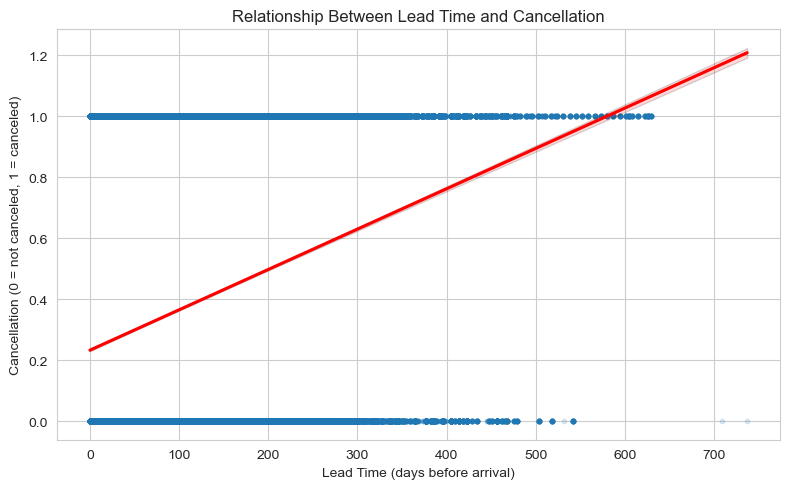

In [22]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x="lead_time",
    y="is_canceled",
    scatter_kws={'alpha': 0.15, 's': 10},
    line_kws={'color': 'red'}
)

plt.title("Relationship Between Lead Time and Cancellation")
plt.xlabel("Lead Time (days before arrival)")
plt.ylabel("Cancellation (0 = not canceled, 1 = canceled)")

# save
plt.tight_layout()
plt.savefig("../reports/figures/relationship_lead_cancel.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/gn/zvx5kxqj5ng9ng0cg5f15yk80000gn/T/ipykernel_20213/2326087689.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_cancel = df.groupby("lead_time_bucket")["is_canceled"].mean()


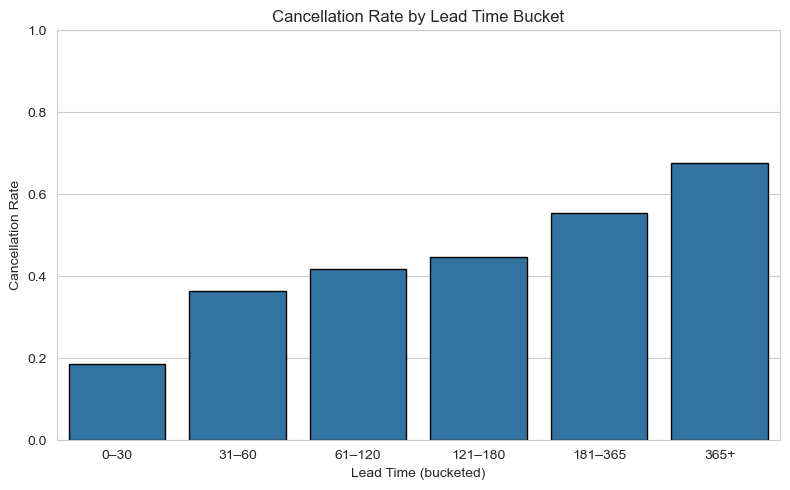

In [23]:

# Lead-time buckets definieren
bins = [0, 30, 60, 120, 180, 365, 800]
labels = ["0–30", "31–60", "61–120", "121–180", "181–365", "365+"]

df["lead_time_bucket"] = pd.cut(df["lead_time"], bins=bins, labels=labels, include_lowest=True)

# Cancellation Rate pro Bucket
bucket_cancel = df.groupby("lead_time_bucket")["is_canceled"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=bucket_cancel.index, y=bucket_cancel.values)

plt.title("Cancellation Rate by Lead Time Bucket")
plt.xlabel("Lead Time (bucketed)")
plt.ylabel("Cancellation Rate")
plt.ylim(0, 1)

plt.tight_layout()
plt.savefig("../reports/figures/cancellation_rate_by_lead_time_bucket.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/gn/zvx5kxqj5ng9ng0cg5f15yk80000gn/T/ipykernel_20213/1304718872.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  curve = df.groupby("lead_time_bin")["is_canceled"].mean()


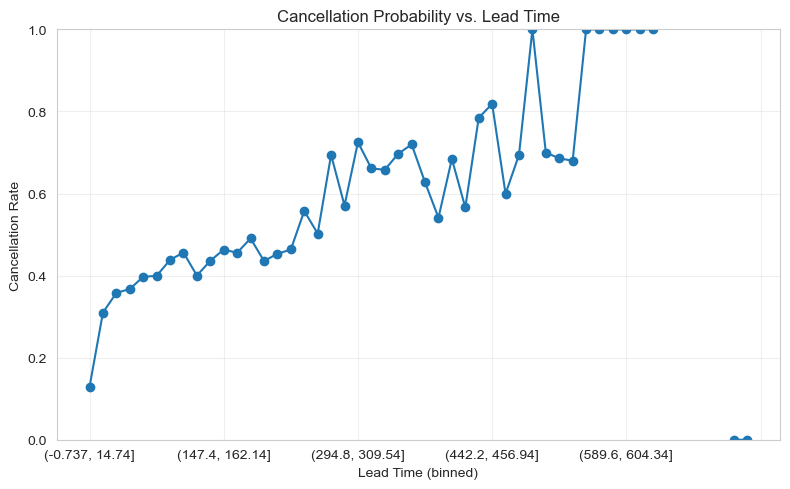

In [24]:


# Lead Time smooth bucket (z.B. 20-Tage Fenster)
df["lead_time_bin"] = pd.cut(df["lead_time"], bins=50)

# Cancellation Rate für jede Lead-Time-Bin
curve = df.groupby("lead_time_bin")["is_canceled"].mean()

plt.figure(figsize=(8,5))
curve.plot(kind="line", marker="o", linestyle="-")

plt.title("Cancellation Probability vs. Lead Time")
plt.xlabel("Lead Time (binned)")
plt.ylabel("Cancellation Rate")
plt.ylim(0, 1)
plt.grid(alpha=0.3)

# Save
plt.tight_layout()
plt.savefig("../reports/figures/cancellation_rate_vs_lead_time_curve.png", dpi=300)
plt.show()


In [25]:
df.dtypes.value_counts()

object      16
int64       16
float64      4
category     1
category     1
Name: count, dtype: int64

### categorical columns

In [26]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card', 'lead_time_bucket', 'lead_time_bin'],
      dtype='object')

In [27]:
categorical_df = df[cat_cols].copy(deep=True)
categorical_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card,lead_time_bucket,lead_time_bin
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,181–365,"(339.02, 353.76]"
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,365+,"(722.26, 737.0]"
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0–30,"(-0.737, 14.74]"
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0–30,"(-0.737, 14.74]"
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0–30,"(-0.737, 14.74]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,0–30,"(14.74, 29.48]"
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,61–120,"(88.44, 103.18]"
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,31–60,"(29.48, 44.22]"
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,61–120,"(103.18, 117.92]"


In [28]:
categorical_df.isna().mean().sort_values(ascending=False)

country                    0.004087
hotel                      0.000000
reservation_status         0.000000
lead_time_bucket           0.000000
credit_card                0.000000
phone-number               0.000000
email                      0.000000
name                       0.000000
reservation_status_date    0.000000
customer_type              0.000000
arrival_date_month         0.000000
deposit_type               0.000000
assigned_room_type         0.000000
reserved_room_type         0.000000
distribution_channel       0.000000
market_segment             0.000000
meal                       0.000000
lead_time_bin              0.000000
dtype: float64

### deposit type inspection

In [29]:
df['deposit_type'].value_counts()


deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

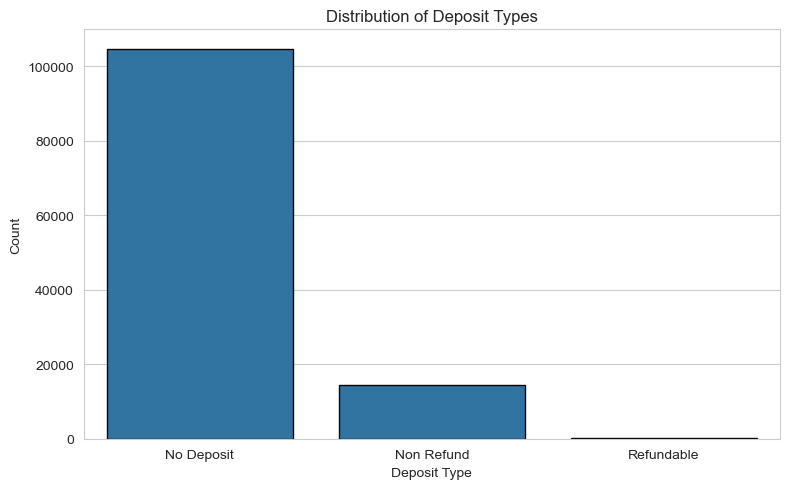

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='deposit_type', order=df['deposit_type'].value_counts().index)

plt.title("Distribution of Deposit Types")
plt.xlabel("Deposit Type")
plt.ylabel("Count")

# plt.tight_layout()
# plt.savefig("../reports/figures/cancellation_rate_vs_lead_time_curve.png", dpi=300)
# plt.show()
plt.tight_layout()
plt.savefig("../reports/figures/distribution_of_deposit_types.png", dpi=300)
plt.show()



### top 20 agents selling rooms

In [31]:
agent_channel_counts = (
    df.groupby(["agent", "distribution_channel"])
      .size()
      .reset_index(name="count")
      .sort_values("count", ascending=False)
)

agent_channel_counts.head(20)


,agent,distribution_channel,count
16,9.0,TA/TO,31939
231,240.0,TA/TO,13872
0,1.0,TA/TO,7191
25,14.0,Direct,3633
10,7.0,TA/TO,3539
9,6.0,TA/TO,3286
244,250.0,Direct,2827
234,241.0,TA/TO,1716
41,28.0,TA/TO,1666
13,8.0,TA/TO,1511


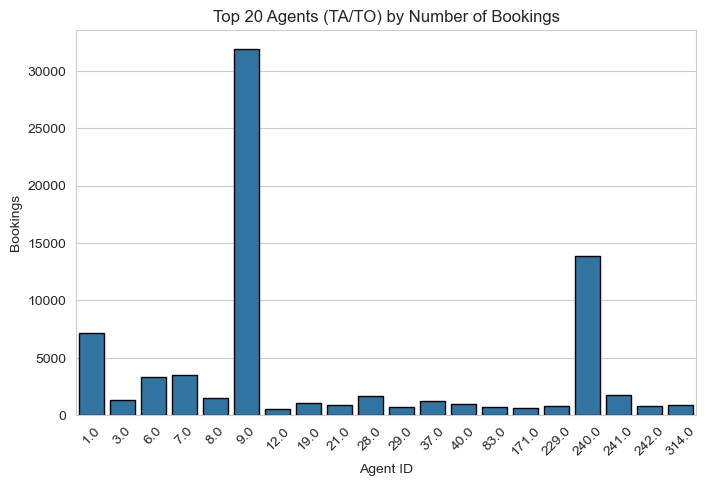

In [32]:
online_agents = agent_channel_counts[agent_channel_counts["distribution_channel"] == "TA/TO"]

top_agents = online_agents.head(20)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_agents, x="agent", y="count")
plt.xticks(rotation=45)
plt.title("Top 20 Agents (TA/TO) by Number of Bookings")
plt.xlabel("Agent ID")
plt.ylabel("Bookings")
plt.show()


## outlier inspection

In [33]:
df['adr'].quantile([0.9, 0.95, 0.99, 0.999])


0.900    164.00000
0.950    193.50000
0.990    252.00000
0.999    326.20163
Name: adr, dtype: float64

In [34]:
df['lead_time'].quantile([0.9, 0.95, 0.99, 0.999])


0.900    265.0
0.950    320.0
0.990    444.0
0.999    605.0
Name: lead_time, dtype: float64

In [35]:
df['days_in_waiting_list'].quantile([0.9, 0.95, 0.99, 0.999])




0.900      0.000
0.950      0.000
0.990     75.000
0.999    231.332
Name: days_in_waiting_list, dtype: float64

In [36]:
df[["lead_time", "is_canceled"]].corr()


,lead_time,is_canceled
lead_time,1.000000,0.293123
is_canceled,0.293123,1.000000


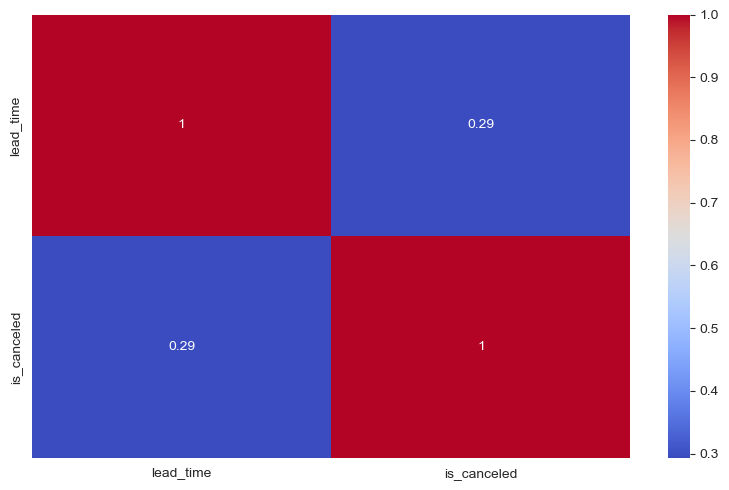

In [37]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["lead_time", "is_canceled"]].corr(), annot=True, cmap="coolwarm")

# save
plt.tight_layout()
plt.savefig("../reports/figures/correlation_heatmap_cancel_vs_lead_time.png", dpi=300)
plt.show()


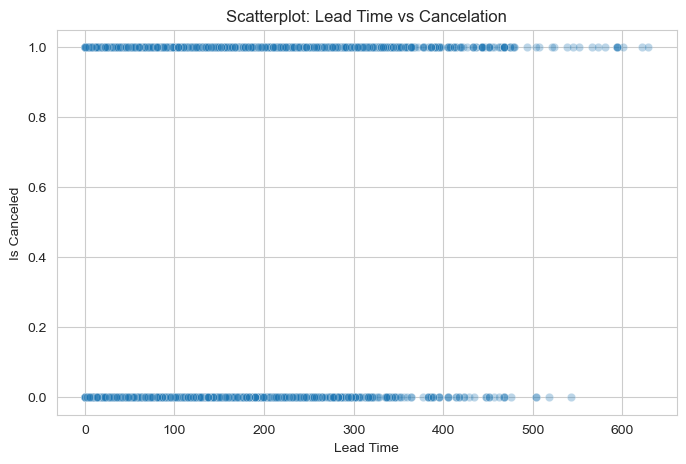

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df.sample(5000, random_state=42),   # reduziert Punkte für bessere Lesbarkeit
    x="lead_time",
    y="is_canceled",
    alpha=0.3
)
plt.title("Scatterplot: Lead Time vs Cancelation")
plt.xlabel("Lead Time")
plt.ylabel("Is Canceled")
plt.show()


In [39]:
df.groupby("deposit_type")["is_canceled"].mean().sort_values(ascending=False)


deposit_type
Non Refund    0.993624
No Deposit    0.283770
Refundable    0.222222
Name: is_canceled, dtype: float64

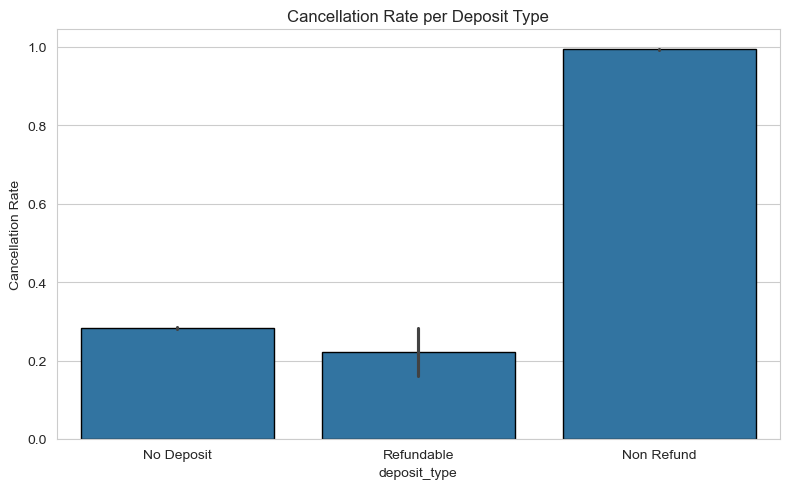

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="deposit_type",
    y="is_canceled",
    estimator="mean"
)
plt.title("Cancellation Rate per Deposit Type")
plt.ylabel("Cancellation Rate")

plt.tight_layout()
plt.savefig("../reports/figures/cancellation_rate_per_deposit_type.png", dpi=300)
plt.show()


In [41]:
df.groupby("deposit_type")["is_canceled"].agg(
    total_bookings="count",
    total_canceled="sum",
    cancel_rate="mean"
).sort_values("cancel_rate", ascending=False)



,total_bookings,total_canceled,cancel_rate
deposit_type,,,
Non Refund,14587,14494,0.993624
No Deposit,104641,29694,0.283770
Refundable,162,36,0.222222


In [42]:
df[df["is_canceled"] == 1].groupby("deposit_type").size()


deposit_type
No Deposit    29694
Non Refund    14494
Refundable       36
dtype: int64

In [43]:
pd.crosstab(df["deposit_type"], df["is_canceled"])


is_canceled,0,1
deposit_type,,
No Deposit,74947,29694
Non Refund,93,14494
Refundable,126,36


In [44]:
non_refund_cancels = df[
    (df["deposit_type"] == "Non Refund") &
    (df["is_canceled"] == 1)
]


In [45]:
non_refund_cancels["distribution_channel"].value_counts()


distribution_channel
TA/TO        13598
Corporate      508
Direct         388
Name: count, dtype: int64

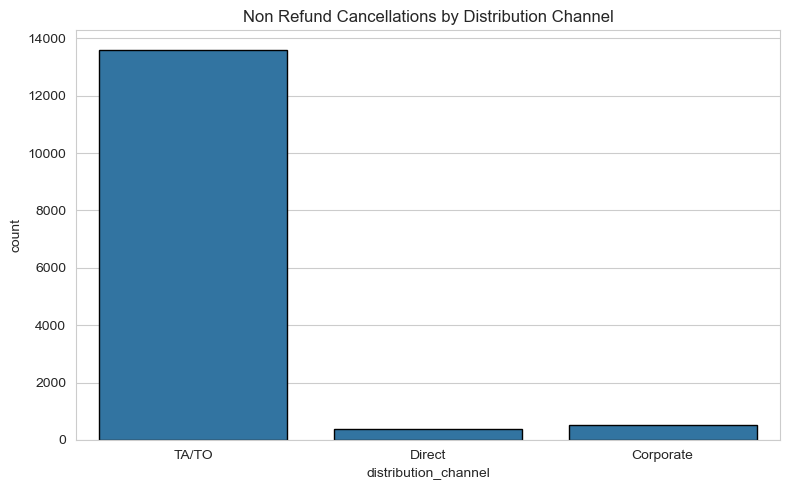

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(data=non_refund_cancels, x="distribution_channel")
plt.title("Non Refund Cancellations by Distribution Channel")


plt.tight_layout()
plt.savefig("../reports/figures/non_refund_cancellations_by_distribution_channel", dpi=300)
plt.show()


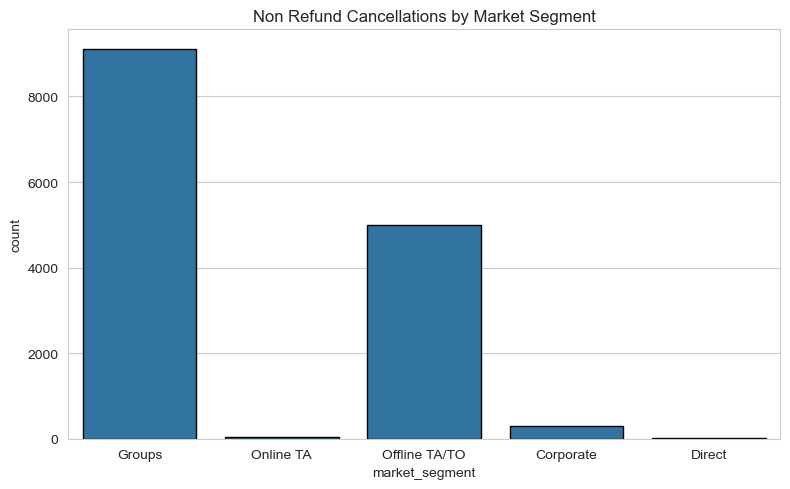

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(data=non_refund_cancels, x="market_segment")
plt.title("Non Refund Cancellations by Market Segment")

plt.tight_layout()
plt.savefig("../reports/figures/non_refund_cancellations_by_market_segment", dpi=300)
plt.show()

In [48]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [49]:
corr_matrix = numeric_df.corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


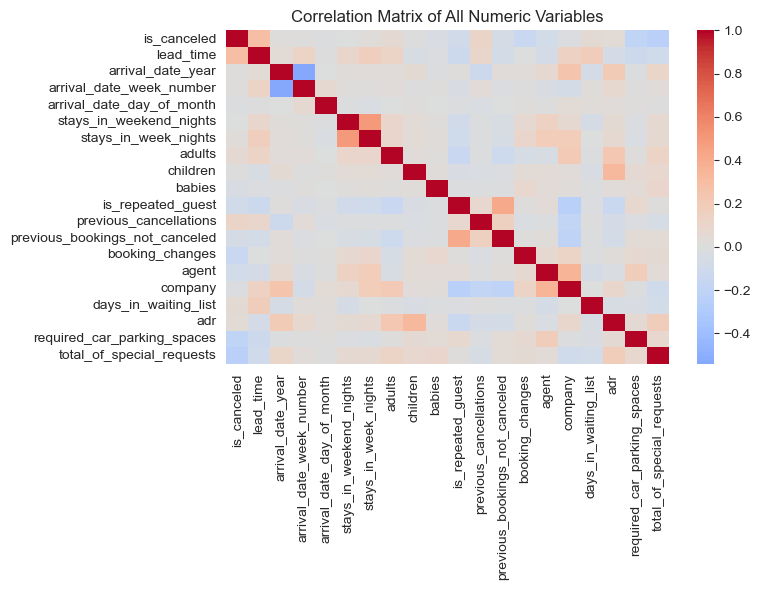

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of All Numeric Variables")

# save
plt.tight_layout()
plt.savefig("../reports/figures/correlation_matrix_of_all_numeric_variables", dpi=300)
plt.show()


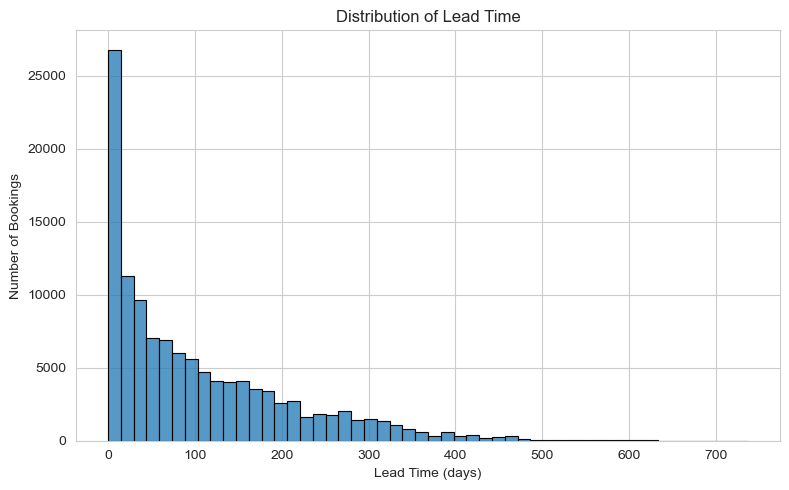

In [51]:
plt.figure(figsize=(8,5))

sns.histplot(df["lead_time"],bins=50)

plt.title("Distribution of Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")

plt.tight_layout()
save_current_fig("lead_time_distribution")
plt.show()
